In [8]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv('tsp.csv', header=None, names = ['n', 'x', 'y'])


def dist(df, perm):
    m = df.shape[0]
    d=0
    for n in range(1, m):
        u = df.iloc[perm[n]]-df.iloc[perm[n-1]]
        d += abs(u.x)+abs(u.y)
    return d



perm = np.random.permutation(df.shape[0])
perm_list = [[perm, dist(df, perm)]]
#print(perm, dist(df, perm))

for n in range(0,1000):
    a,b = sorted(random.sample(range(0,52), 2))
    m = perm[a]
    perm[a] = perm[b]
    perm[b] = m
    #print(perm, dist(df, perm))
    #print()
    perm_list.append([perm, dist(df, perm)])
    
best_perm = min(perm_list, key = lambda t: t[1])
print('Min route length: %s' %best_perm[1])

Min route length: 31135


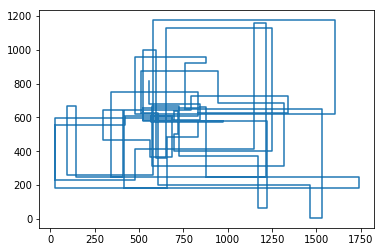

In [10]:
import matplotlib.pyplot as plt

df2 = df
df2['perm'] = best_perm[0]*2

df2 = df2.set_index(df['perm']).drop(columns = ['perm'])

for k in range(1, 103, 2):
    df2.loc[k] = np.array([0,df2.loc[k+1,'x'],df2.loc[k-1,'y']])

df2 = df2.sort_index()

plt.plot(df2.x, df2.y)
plt.show()